In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Import dataset
thurber = pd.read_csv('Thurber.csv')

# Split off 20% of the data to be left out as test data
thurberTrainingData, test_data = train_test_split(thurber, test_size=0.20)

# Store relevant columns as variables
X = thurberTrainingData[['log(Density)']].values.reshape(-1, 1)
y = thurberTrainingData[['Electron mobility']].values.reshape(-1, 1)

Text(0, 0.5, 'Electron mobility')

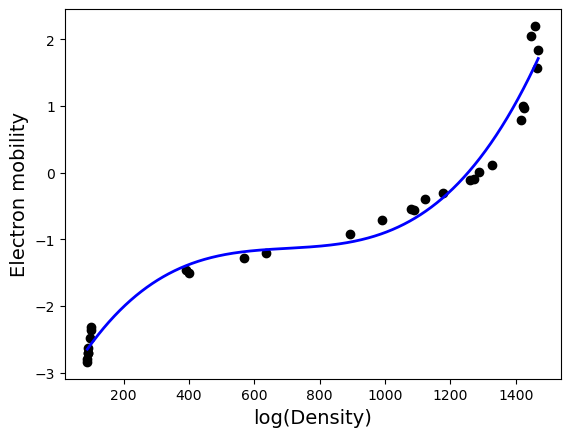

In [3]:
# Fit a cubic regression model
polyFeatures = PolynomialFeatures(degree=3, include_bias=False)
XPoly = polyFeatures.fit_transform(X)
polyModel = LinearRegression()
polyModel.fit(XPoly, y)

# Graph the scatterplot and the polynomial regression
plt.scatter(X, y, color='black')
xDelta = np.linspace(X.min(), X.max(), 1000)
yDelta = polyModel.predict(polyFeatures.fit_transform(xDelta.reshape(-1, 1)))
plt.plot(xDelta, yDelta, color='blue', linewidth=2)
plt.xlabel('log(Density)', fontsize=14)
plt.ylabel('Electron mobility', fontsize=14)

In [4]:
# Collect cross-validation metrics
cvMeans = []
cvStdDev = []

for i in range(1, 7):
    # Fit a degree i polynomial regression model
    polyFeatures = PolynomialFeatures(degree=i, include_bias=False)
    XPoly = polyFeatures.fit_transform(X)
    polyModel = LinearRegression()
    polyModel.fit(XPoly, y)

    # Carry out 10-fold cross-validation for the a degree i polynomial regression model
    polyscore = -cross_val_score(
        polyModel, XPoly, y, scoring='neg_mean_squared_error', cv=10
    )

    # Store the mean and standard deviation of the 10-fold cross-validation for the degree i polynomial regression model
    cvMeans.append(np.mean(polyscore))
    cvStdDev.append(np.std(polyscore))

Text(0, 0.5, 'Mean squared error')

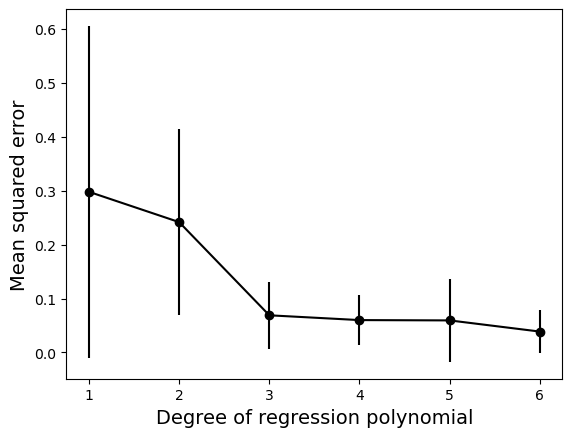

In [5]:
# Graph the errorbar chart using the cross-validation means and std deviations
plt.errorbar(x=range(1, 7), y=cvMeans, yerr=cvStdDev, marker='o', color='black')
plt.xlabel('Degree of regression polynomial', fontsize=14)
plt.ylabel('Mean squared error', fontsize=14)